In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies=pd.read_csv("movies.csv")

In [3]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [4]:
links=pd.read_csv("links.csv")

In [5]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [6]:
tags=pd.read_csv("tags.csv")

In [7]:
tags.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [8]:
ratings=pd.read_csv("ratings.csv")

In [9]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [10]:
movies.shape

(9742, 3)

In [11]:
ratings.shape

(100836, 4)

In [13]:
ratings["userId"].nunique()

610

In [14]:
a=pd.merge(movies,ratings)

In [15]:
a

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [16]:
len(a[a["title"]=="Matrix, The (1999)"])

278

In [17]:
len(a[a["title"]=="Pulp Fiction (1994)"])

307

In [19]:
len(a[a["title"]=="Forrest Gump (1994)"])

329

In [20]:
len(a[a["title"]=="Shawshank Redemption, The (1994)"])

317

In [21]:
b=pd.merge(movies,tags)

In [22]:
b

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [24]:
b[b["title"]=="Matrix, The (1999)"]

,movieId,title,genres,userId,tag,timestamp
1313,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,martial arts,1457842912
1314,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,sci-fi,1457842899
1315,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474,alternate universe,1137204991
1316,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,philosophy,1424141098
1317,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,post apocalyptic,1424141101


In [29]:
c=a[a["title"]=="Terminator 2: Judgment Day (1991)"]

In [30]:
np.mean(c["rating"])

3.970982142857143

In [35]:
d=a[a["title"]=="Fight Club (1999)"]

<Axes: xlabel='rating', ylabel='Count'>

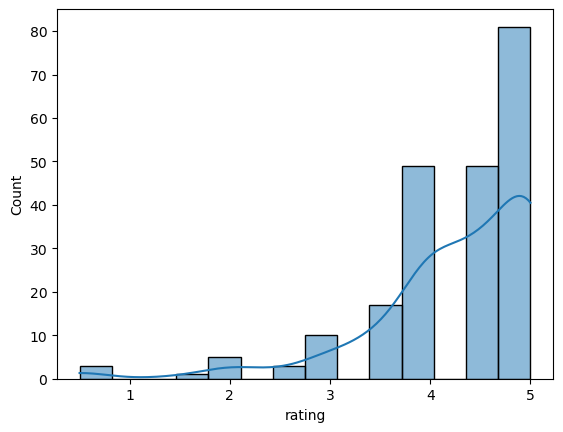

In [36]:
sns.histplot(data=d,x="rating",kde=True)

In [37]:
grouped_ratings=ratings.groupby("movieId")["rating"].agg(["count","mean"])

In [38]:
grouped_ratings

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [39]:
result_df=pd.merge(movies,grouped_ratings,on="movieId",how="inner")

In [40]:
result_df

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [41]:
c=result_df[result_df["count"]>50]

In [42]:
c

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [43]:
c[c["title"]=="Godfather, The (1972)"]

,movieId,title,genres,count,mean
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062


In [44]:
c[c["title"]=="Shawshank Redemption, The (1994)"]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


In [46]:
c[c["title"]=="Jumanji (1995)"]

,movieId,title,genres,count,mean
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818


In [47]:
c[c["title"]=="Wolf of Wall Street, The (2013)"]

,movieId,title,genres,count,mean
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667


In [48]:
d=c.sort_values(by="count",ascending=False)

In [49]:
d

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...
3147,4239,Blow (2001),Crime|Drama,51,3.813725
3490,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


In [50]:
d[d["title"]=="Deadpool (2016)"]

,movieId,title,genres,count,mean
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333


In [51]:
d[d["title"]=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres,count,mean
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982


In [52]:
d[d["title"]=="X-Men: The Last Stand (2006)"]

,movieId,title,genres,count,mean
6192,45499,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller,52,3.355769


In [53]:
d[d["title"]=="Jurassic Park (1993)"]

,movieId,title,genres,count,mean
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.75


In [54]:
s=pd.merge(d,links,on="movieId")

In [55]:
s

,movieId,title,genres,count,mean,imdbId,tmdbId
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134,109830,13.0
1,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068,110912,680.0
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290,102926,274.0
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,133093,603.0
...,...,...,...,...,...,...,...
431,4239,Blow (2001),Crime|Drama,51,3.813725,221027,4133.0
432,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118,139654,2034.0
433,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137,166924,1018.0
434,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098,112442,9737.0


In [56]:
movies[movies['title']=="Matrix, The (1999)"]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
